# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
print(df.head(3))
print(df.iloc[:3, :])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
print(df.iloc[:, [0, 1]])

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
print(df.loc[:, ['animal', 'age']].iloc[[3,4,8], :])

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
print(df[df['visits'] > 0])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
print(df[df['age'].isnull()])

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
print(df[(df['animal'] == 'cat') & df['age'] <= 3])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
print(df[(df['age'] >= 2) & (df['age'] <= 4)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


```Change the age in row 'f' to 1.5.```

In [0]:
df.loc['f', 'age'] = 1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
#  Numpy
visits = np.array(df['visits'])
print("Sum is ", np.sum(visits))

#  Pandas
visits = df['visits']
print("Sum is ", visits.sum())

Sum is  19
Sum is  19


```Calculate the mean age for each different animal in `df`.```

In [13]:
print(df.groupby('animal')['age'].mean())

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [14]:
df.loc['k'] = ['cat', 3, 3, 'yes']
print(df)
df = df.drop('k')
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k    cat  3.0       3      yes
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Count the number of each type of animal in `df`.```

In [15]:
print(df['animal'].value_counts())

cat      4
dog      4
snake    2
Name: animal, dtype: int64


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:
print(df.sort_values('age', ascending=False))
print(df.sort_values('visits', ascending=True))

  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
b    cat  3.0       3      yes
j    dog  3.0       1       no
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
d    dog  NaN       3      yes
h    cat  NaN       1      yes
  animal  age  visits priority
a    cat  2.5       1      yes
g  snake  4.5       1       no
h    cat  NaN       1      yes
j    dog  3.0       1       no
c  snake  0.5       2       no
e    dog  5.0       2       no
i    dog  7.0       2       no
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  1.5       3       no


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:
df = df.replace({'yes': True, 'no': False})

print(df)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  1.5       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
df = df.replace({'snake': 'python'})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [19]:
pd.pivot_table(df, index=['animal', 'visits'], aggfunc={np.mean, np.sum})

age       priority     
               mean   sum     mean  sum
animal visits                          
cat    1       2.50   2.5      1.0  2.0
       3       2.25   4.5      0.5  1.0
dog    1       3.00   3.0      0.0  0.0
       2       6.00  12.0      0.0  0.0
       3        NaN   0.0      1.0  1.0
python 1       4.50   4.5      0.0  0.0
       2       0.50   0.5      0.0  0.0

```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
import numpy.random as rand

data = list()

for i in range(1000):
    age = rand.randint(20, 66)
    skill = 0.3 * rand.randn() + 0.5
    height = 0.5 * rand.random_sample() + 1.5
    height = np.around(height, 2)
    
    data.append([age, skill, height])

new_df = pd.DataFrame(data, columns=['age', 'skill', 'height'])

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [21]:
def salary(row):
    age, skill, height = row['age'], row['skill'], row['height']
    return 1000* (age**2) / 1000 + 1.7*skill + 0.4 * np.exp(-(height-1.7)**2)

new_df['salary'] = new_df.apply(salary, axis=1)
new_df

,age,skill,height,salary
0,28,0.890850,1.91,785.897188
1,40,0.805259,1.69,1601.768901
2,36,0.604607,1.86,1297.417722
3,35,0.314438,1.94,1225.912155
4,42,0.935580,1.93,1765.969876
5,60,0.121975,1.50,3600.591673
6,59,1.086517,1.68,3483.246919
7,55,0.625950,1.73,3026.463755
8,39,0.694294,1.94,1522.557910
9,26,0.369713,1.71,677.028472


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [22]:
#  By the age left digit
def get_left_digit(age):
    return age % 10

def distinct(x):
    return len(x)

funcs = {
    'count': distinct,
    'salary': np.mean,
    'height': np.max
}

new_df['age_left'] = new_df['age'].apply(get_left_digit)
new_df['count'] = new_df['age']
print(pd.pivot_table(new_df, index=['age_left'], aggfunc=funcs))

#  By the age

print(pd.pivot_table(new_df, index=['age'], aggfunc=funcs))

          count  height       salary
age_left                            
0            93    2.00  1751.785250
1           128    2.00  1994.112798
2           112    2.00  1753.610221
3            92    2.00  2003.271973
4           109    1.99  2117.437312
5           111    2.00  2154.253666
6            97    2.00  1774.844861
7            80    1.98  1985.656402
8            93    2.00  1828.700836
9            85    2.00  2246.974025
     count  height       salary
age                            
20      17    2.00   401.417551
21      19    1.99   442.322795
22      23    2.00   485.299493
23      18    2.00   530.310151
24      21    1.97   577.353114
25      24    1.99   626.267521
26      23    1.99   677.305345
27      15    1.96   730.072779
28      26    2.00   785.227882
29      17    1.99   842.271804
30      21    1.98   901.232135
31      21    1.98   962.269486
32      29    1.99  1025.227560
33      13    1.97  1090.271919
34      24    1.94  1157.247439
35      24  

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [23]:
def mean_divided(row):
    return np.mean(row['salary']) / np.sum(row['height'])

result = new_df.groupby('age').agg(mean_divided)['salary']
print(result)

age
20     12.948953
21     13.259077
22     11.944364
23     16.723751
24     15.338818
25     14.635838
26     16.794082
27     29.028739
28     17.333949
29     28.359320
30     24.759125
31     26.655664
32     20.245410
33     47.756107
34     27.494593
35     29.319858
36     28.697954
37     49.357521
38     27.638364
39     46.865588
40     44.790718
41     29.108772
42     43.045053
43     39.356983
44     50.420621
45     58.171753
46     41.884380
47     39.369351
48     66.262799
49     59.831027
50     78.214222
51     49.318977
52     64.516696
53     77.910546
54     75.540454
55     74.449262
56     88.673911
57    108.773393
58    104.319816
59     75.310548
60    130.282576
61     85.474263
62    171.041027
63    179.808964
64    109.490413
65    124.489196
Name: salary, dtype: float64


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

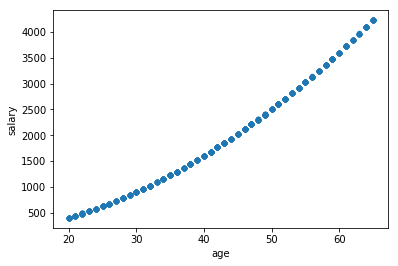

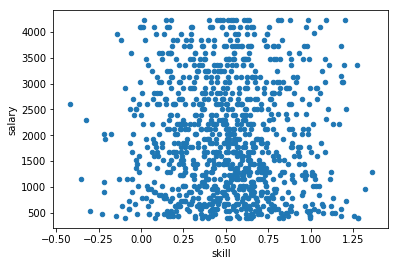

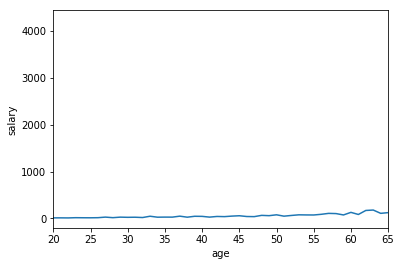

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

new_df.plot(x = 'age', y = 'salary', kind="scatter")
new_df.plot(x = 'skill', y = 'salary', kind="scatter")
new_df.plot(x = 'height', y = 'salary', kind="scatter")
result.plot()
plt.show()


```Save the result as a csv```

In [25]:
result.to_csv('result.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd.options.display.max_columns=50

df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

Total number of houses:  1460
Higest price in 1872.0:  122000
Mean area of houses:  10516.828082191782
50 Percentile:  9478.5
Houses with fireplaces:  770
There are more houses with fireplaces than without
Mean price of houses with pools:  288138.5714285714


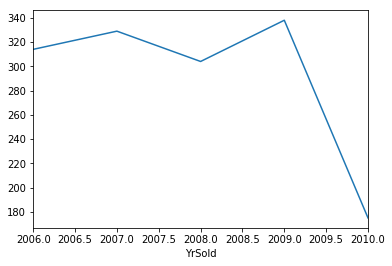

In [28]:
print("Total number of houses: ", df.iloc[:, 0].count())

#  Oldest house
oldest_house = df.sort_values("YearBuilt", ascending=True).iloc[0]
oldest_house_year = oldest_house['YearBuilt']

#  Highest price in same year
highest = df.groupby('YearBuilt').max().loc[:, 'SalePrice'].loc[oldest_house_year]
print("Higest price in " + str(oldest_house_year) + ": ", highest)

#  Mean area of houses (LotArea)
mean_area = df['LotArea'].mean()
print("Mean area of houses: ", mean_area)

#  50-percentile
fifty_percentile = np.percentile(df['LotArea'], 50)
print("50 Percentile: ", fifty_percentile)

#
def zero_or_one(x):
    if x > 0:
        return 1
    
    return 0

print("Houses with fireplaces: ", df['Fireplaces'].apply(zero_or_one).sum())
print("There are more houses with fireplaces than without")

#  Mean price of houses with pools
print("Mean price of houses with pools: ", df[df['PoolArea'] > 0]['SalePrice'].mean())

#  Number of houses sold
df.groupby('YrSold')['Id'].count().plot(x="Year", y="Number of houses sold")

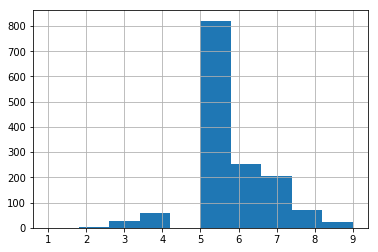

In [29]:
# Distribution of OverallCond
df['OverallCond'].hist()

``` - For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual ```

In [30]:
#  Count data for every number of fireplaces in a house
curr_year = 2019

def mean_age(year_built):
    return np.mean(curr_year - year_built)

new_df = df.groupby('Fireplaces').agg({'SalePrice': 'mean', 'YearBuilt': mean_age, 'FullBath': 'nunique'})
new_df.columns = ['MeanSalePrice', 'MeanAge', 'FullBathUnique']

new_df

,MeanSalePrice,MeanAge,FullBathUnique
Fireplaces,,,
0,141331.482609,54.781159,4
1,211843.909231,39.150769,4
2,240588.539130,54.347826,4
3,252000.000000,38.400000,2


In [31]:
df['IsMultiple'] = df['MSSubClass'] % 20 == 0
df.groupby('IsMultiple').agg({'OverallQual': ['mean', 'max', 'min']})

OverallQual        
                  mean max min
IsMultiple                    
False         5.320099  10   1
True          6.396405  10   1

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [33]:
df['LotAreaMeters'] = df['LotArea'] * 0.092903
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['SqrtGarageArea'] = df['GarageArea'] ** 0.5
df['LotAreaToBedroom'] = df['LotAreaMeters'] / (df['BedroomAbvGr']+1)

mean_lot_area = df.groupby('YearBuilt')['LotArea'].mean()

def lot_area_to_mean_in_year(x):
    lot_area, year = x['LotAreaMeters'], x['YearBuilt']
    result = list()
    for i in range(len(result)):
        mean_lot_area = mean_lot_area.loc(year[i])
        result.append(lot_area[i] / (mean_lot_area + 1e-5))
    
    return result

large = pd.merge((df.groupby('YearBuilt').mean()['LotArea'] + 1e-5).reset_index(),df,on='YearBuilt')
df['LotAreaToMeanInYear'] = large['LotArea_y']/large['LotArea_x']

df['LotScore'] = df['LotArea'].rank()

lotConfigDummies = pd.get_dummies(df.loc[:, 'LotConfig'])
df[list(lotConfigDummies)] = lotConfigDummies

feature_list = [
    'LotAreaMeters',
    'TotalSF',
    'SqrtGarageArea',
    'LotAreaToBedroom',
    'LotAreaToMeanInYear',
    'LotScore'
]

feature_list.extend(lotConfigDummies.columns.values)

print(feature_list)

['LotAreaMeters', 'TotalSF', 'SqrtGarageArea', 'LotAreaToBedroom', 'LotAreaToMeanInYear', 'LotScore', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

0.004321220174556937

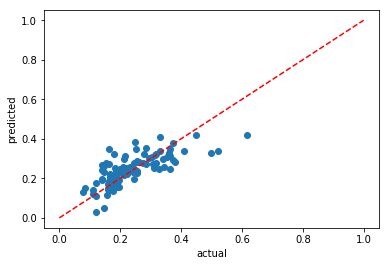

In [35]:
data = df[feature_list]
target = df["SalePrice"]/np.max(df["SalePrice"])

#  Split data into train and test
train = data[:-100]
test = data[-100:]

reg = LinearRegression(normalize =True)
reg.fit(train, target[:-100])

plt.plot([0,1],[0,1],'r--')
plt.scatter(target[-100:],reg.predict(test))
plt.xlabel("actual")
plt.ylabel("predicted")
mean_squared_error(target[-100:],reg.predict(test))

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge

In [37]:
data = df[feature_list]
target = df["SalePrice"]/np.max(df["SalePrice"])

for a in data.columns:
    data["{}**2".format(a)]=data[a]**2
    data["{}**3".format(a)]=data[a]**3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


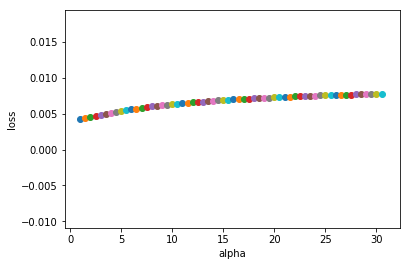

In [38]:
train = data[:-100]
test = data[-100:]


for i in range(10,310,5):
    reg = Ridge(alpha=i/10, normalize=True)
    reg.fit(train,target[:-100])


    plt.scatter(i/10,mean_squared_error(target[-100:],reg.predict(test)))
    plt.xlabel("alpha")
    plt.ylabel("loss")